In [22]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Logistic Regression
## Classification Using Linear Regression
Load your data.

In [23]:
from helpers import sample_data, load_data, standardize

# load data.
height, weight, gender = load_data()

# build sampled x and y.
seed = 1
y = np.expand_dims(gender, axis=1)
X = np.c_[height.reshape(-1), weight.reshape(-1)]
y, X = sample_data(y, X, seed, size_samples=200)
x, mean_x, std_x = standardize(X)

Use `least_squares` to compute w, and visualize the results.

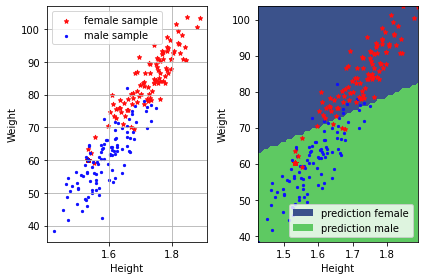

In [24]:
from least_squares import least_squares
from plots import visualization

def least_square_classification_demo(y, x):
    # ***************************************************
    # INSERT YOUR CODE HERE
    # classify the data by linear regression: TODO
    # ***************************************************
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    # w = least squares with respect to tx and y
    mse, w = least_squares(y, tx)

    visualization(y, x, mean_x, std_x, w, "classification_by_least_square")
    
least_square_classification_demo(y, x)

## Logistic Regression

Compute negative log likelihood loss.

In [25]:
def sigmoid(t):
    """apply the sigmoid function on t."""
    return np.exp(t) / (1 + np.exp(t))

In [26]:
def calculate_loss(y, tx, w):
    """compute the loss: negative log likelihood."""
    loss = 0
    for n, x_n in enumerate(tx):
        loss += np.log(1 + np.exp(x_n.T @ w)) - y[n]*x_n.T @ w
    return loss

In [27]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    gradient = tx.T @ (sigmoid(tx@w) - y)
    return gradient

### Using Gradient Descent
Implement your function to calculate the gradient for logistic regression.

In [28]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    w = w - gamma * gradient
    return loss, w

Demo!

Current iteration=0, loss=[138.62943611]
Current iteration=100, loss=[43.46403231]
Current iteration=200, loss=[41.54589281]
Current iteration=300, loss=[41.09863897]
Current iteration=400, loss=[40.96487064]
Current iteration=500, loss=[40.92008946]
Current iteration=600, loss=[40.90418744]
Current iteration=700, loss=[40.89834995]
Current iteration=800, loss=[40.89616497]
Current iteration=900, loss=[40.89533753]
Current iteration=1000, loss=[40.89502196]
Current iteration=1100, loss=[40.89490109]
Current iteration=1200, loss=[40.89485466]
Current iteration=1300, loss=[40.8948368]
Current iteration=1400, loss=[40.89482992]
Current iteration=1500, loss=[40.89482727]
loss=[40.89482664]


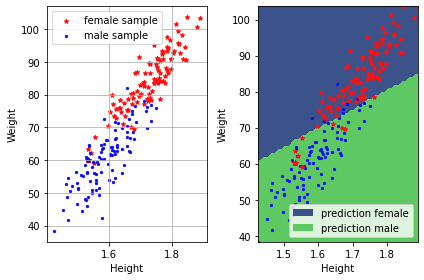

In [41]:
from helpers import de_standardize

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.01
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_gradient_descent", True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_gradient_descent_demo(y, x)

Calculate your Hessian below

In [34]:
def calculate_hessian(y, tx, w):
    """return the Hessian of the loss function."""
    temp = tx @ w
    temp = sigmoid(temp) * (1 - sigmoid(temp))
    N = y.shape[0]
    S = np.zeros((N,N))
    np.fill_diagonal(S, temp)
    return tx.T @ S @ tx

Write a function below to return loss, gradient, and Hessian.

In [31]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and Hessian."""
    loss = calculate_loss(y, tx, w)
    gradient = calculate_gradient(y, tx, w)
    hessian = calculate_hessian(y, tx, w)
    return loss, gradient, hessian

### Using Newton's method
Use Newton's method for logistic regression.

In [32]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, gradient, hessian = logistic_regression(y, tx, w)
    w = w - gamma * np.linalg.inv(hessian) @ gradient
    return loss, w

demo

Current iteration=0, the loss=[138.62943611]
Current iteration=1, the loss=[63.41155374]
Current iteration=2, the loss=[47.3045862]
Current iteration=3, the loss=[41.99746742]
Current iteration=4, the loss=[40.95639864]
Current iteration=5, the loss=[40.89511994]
Current iteration=6, the loss=[40.89482562]
Current iteration=7, the loss=[40.89482561]
loss=[40.89482561]


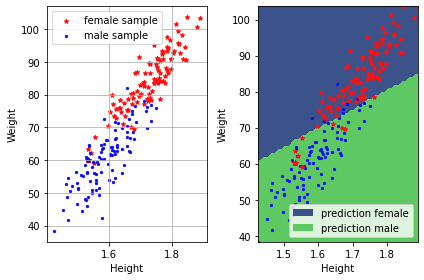

In [39]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 100
    threshold = 1e-8
    lambda_ = 0.1
    gamma = 1.
    losses = []
    gamma = 1

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_newton_method",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))

logistic_regression_newton_method_demo(y, x)

### Using penalized logistic regression (first-order, no Newton)
Fill in the function below.

In [53]:
def calculate_loss(y, tx, w, lambda_ = 0):
    """compute the loss: negative log likelihood."""
    loss = 0
    for n, x_n in enumerate(tx):
        loss += np.log(1 + np.exp(x_n.T @ w)) - y[n]*x_n.T @ w
    return loss + lambda_ / 2 * w.T @ w

In [42]:
def calculate_gradient(y, tx, w, lambda_):
    """compute the gradient of loss."""
    gradient = tx.T @ (sigmoid(tx@w) - y)
    return gradient + lambda_ * w

In [49]:
def penalized_logistic_regression(y, tx, w, lambda_):
    """return the loss, gradient"""
    loss = calculate_loss(y, tx, w, lambda_)
    gradient = calculate_gradient(y, tx, w, lambda_)
    return loss, gradient

In [51]:
def learning_by_penalized_gradient(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent, using the penalized logistic regression.
    Return the loss and updated w.
    """
    loss, gradient = penalized_logistic_regression(y, tx, w, lambda_)
    w = w - gamma * gradient
    return loss, w

Current iteration=0, loss=[[138.62943611]]
Current iteration=100, loss=[[44.83540395]]
Current iteration=200, loss=[[43.49960386]]
Current iteration=300, loss=[[43.28110659]]
Current iteration=400, loss=[[43.23721999]]
Current iteration=500, loss=[[43.22766657]]
Current iteration=600, loss=[[43.22551203]]
Current iteration=700, loss=[[43.22501811]]
Current iteration=800, loss=[[43.22490401]]
Current iteration=900, loss=[[43.22487755]]
Current iteration=1000, loss=[[43.2248714]]
loss=[[41.22329986]]


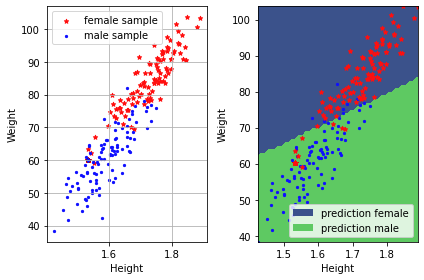

In [54]:
def logistic_regression_penalized_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    gamma = 0.01
    lambda_ = 0.1
    threshold = 1e-8
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_penalized_gradient(y, tx, w, gamma, lambda_)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, loss={l}".format(i=iter, l=loss))
        # converge criterion
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    # visualization
    visualization(y, x, mean_x, std_x, w, "classification_by_logistic_regression_penalized_gradient_descent",True)
    print("loss={l}".format(l=calculate_loss(y, tx, w)))
    
logistic_regression_penalized_gradient_descent_demo(y, x)